In [63]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import seaborn as sns

In [57]:
data = pd.read_csv("language_dataset.csv")
print(data.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


0        Estonian
1         Swedish
2            Thai
3           Tamil
4           Dutch
           ...   
21995      French
21996        Thai
21997     Spanish
21998     Chinese
21999    Romanian
Name: language, Length: 22000, dtype: object

In [49]:
## Lets check for any NULL values in the dataset.

In [50]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [51]:
# Drop rows with missing values (if any)
data = data.dropna()

In [52]:
print(data.columns)

Index(['Text', 'language'], dtype='object')


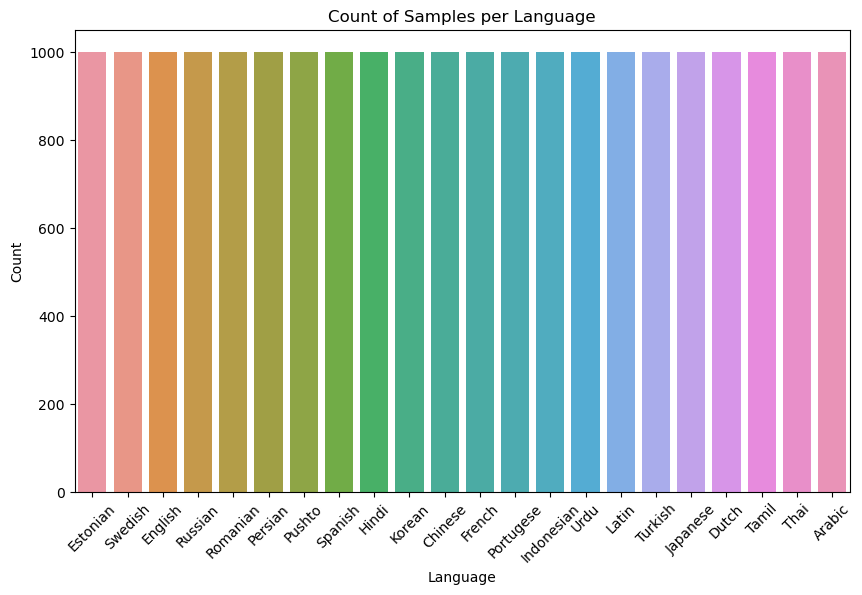

In [53]:
# Count of samples per language
plt.figure(figsize=(10, 6))
sns.barplot(x=data.language.value_counts().index, y=data.language.value_counts())
plt.title('Count of Samples per Language')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
## Check all the languages present in this dataset

In [7]:
data["language"].value_counts()

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64

This dataset includes 22 languages, each represented by 1,000 sentences. It is well-balanced with no missing values, making it fully prepared for training a machine learning model.

In [8]:
# copy data into texts and labels
texts = data['Text']
labels = data['language']

In [9]:
# Step 1: Data Preparation
# Split the dataset into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(texts,labels, test_size=0.2, random_state=42)
# Check shapes to ensure consistency
print(f"X_train shape: {np.array(X_train).shape}, y_train shape: {np.array(y_train).shape}")
print(f"X_test shape: {np.array(X_test).shape}, y_test shape: {np.array(y_test).shape}")

X_train shape: (17600,), y_train shape: (17600,)
X_test shape: (4400,), y_test shape: (4400,)


In [11]:
# Step 2: Text Processing
# Convert text data into numerical features using Count Vectorizer

In [12]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [13]:
# Ensure the shapes after vectorization
print(f"X_train_counts shape: {X_train_counts.shape}, y_train shape: {np.array(y_train).shape}")
print(f"X_test_counts shape: {X_test_counts.shape}, y_test shape: {np.array(y_test).shape}")

X_train_counts shape: (17600, 238293), y_train shape: (17600,)
X_test_counts shape: (4400, 238293), y_test shape: (4400,)


Since this is a multiclass classification problem, I will use the Multinomial Naïve Bayes algorithm to train the language detection model, as it consistently performs well for multiclass classification tasks.

In [14]:
# Step 3: Training the Model
# Train the Multinomial Naive Bayes model on the training set
model = MultinomialNB()
model.fit(X_train_counts, y_train)

MultinomialNB()

In [26]:
# Step 4: Testing the Model
# Predict the language of the text samples in the test set
y_pred = model.predict(X_test_counts)
print(y_pred)

['Japanese' 'Russian' 'Latin' ... 'English' 'Pushto' 'Dutch']


Now, let's apply this model to detect the language of a text by accepting user input:

In [25]:
user = input("Enter a Text: ")
data = vectorizer.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: keadaan
['Indonesian']


In [ ]:
#Model Accuracy:

In [29]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.23%


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Alternatively, you can get a full classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.96
Recall: 0.94
F1 Score: 0.94
Classification Report:
              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       202
     Chinese       0.96      0.49      0.65       201
       Dutch       0.98      0.98      0.98       230
     English       0.68      1.00      0.81       194
    Estonian       0.99      0.95      0.97       200
      French       0.94      0.99      0.97       188
       Hindi       1.00      0.99      0.99       208
  Indonesian       1.00      0.98      0.99       213
    Japanese       0.98      0.64      0.78       194
      Korean       0.99      0.99      0.99       190
       Latin       0.98      0.90      0.94       210
     Persian       1.00      0.99      1.00       196
   Portugese       0.99      0.96      0.98       194
      Pushto       1.00      0.96      0.98       196
    Romanian       0.98      0.98      0.98       197
     Russian       0.99      0.99      0.99       213
     Spanish  

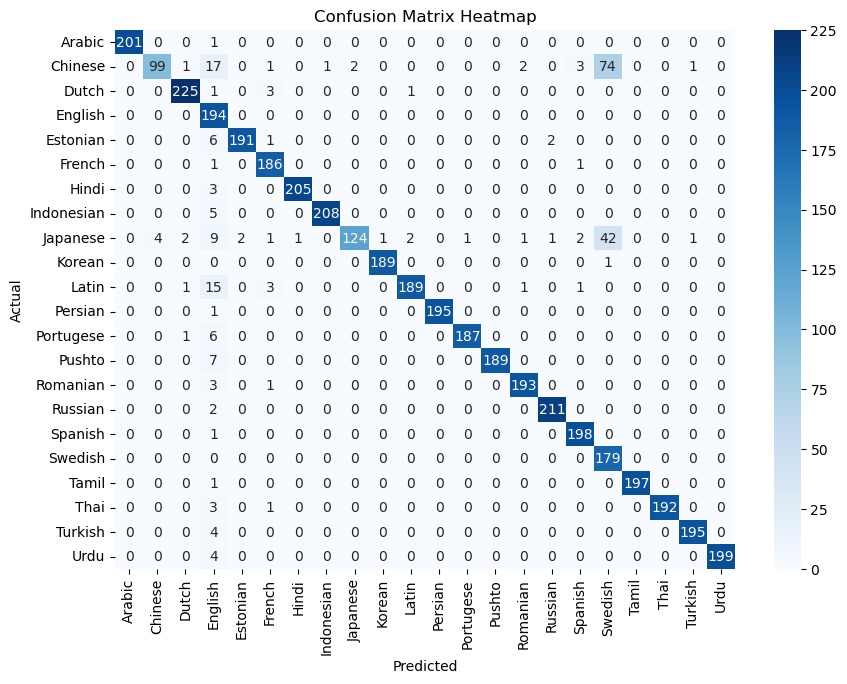

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

As you can see, the model performs well. However, it's important to note that this model can only detect the languages included in the dataset.

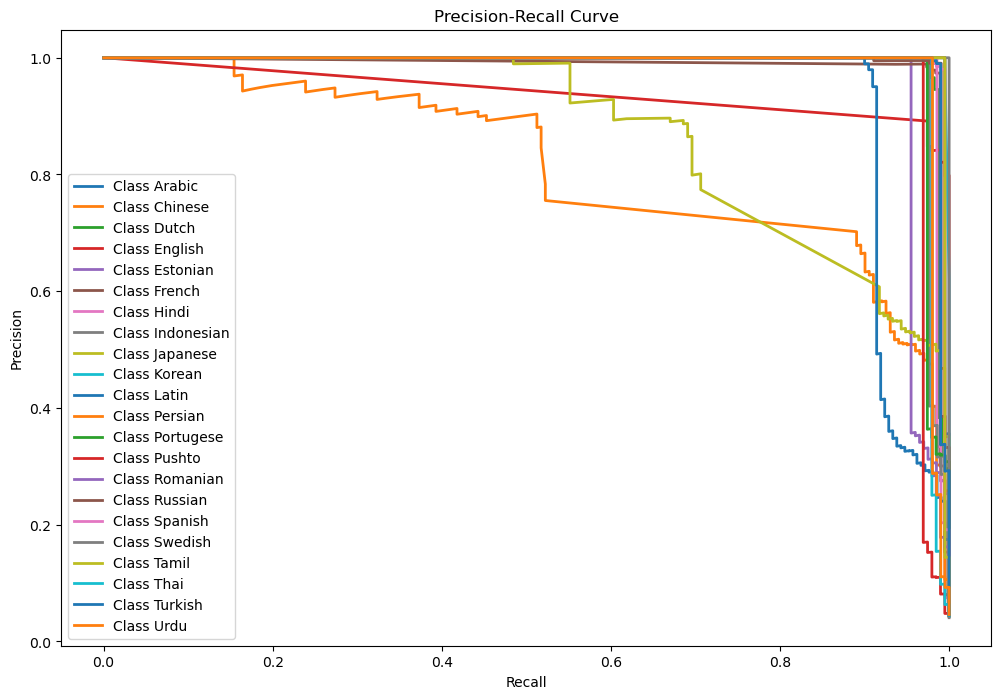

In [64]:
# Binarize the output for multi-class precision-recall and ROC curve
y_test_binarized = label_binarize(y_test, classes=model.classes_)
n_classes = len(model.classes_)

# Get the predicted probabilities
y_score = model.predict_proba(X_test_counts)

# Precision-Recall Curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {model.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()